# <center> 利用pca降维对minist数据集降维和聚类

## 导入minist数据集

In [75]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('minist/',one_hot = False)

Extracting minist/train-images-idx3-ubyte.gz
Extracting minist/train-labels-idx1-ubyte.gz
Extracting minist/t10k-images-idx3-ubyte.gz
Extracting minist/t10k-labels-idx1-ubyte.gz


## 随机选取2000个数据

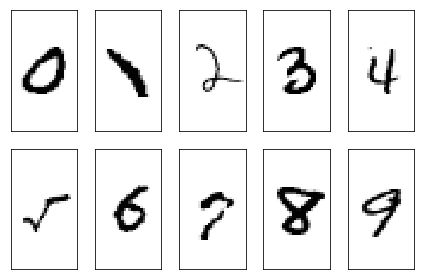

In [21]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg 
%matplotlib inline
#取一部分数据
train = data.train.images
lable = data.train.labels
sample_index = np.random.randint(0,54999,size=2000)
sample = train[sample_index]
lablesam = lable[sample_index]
tr = np.reshape(sample,(2000,28,28)).astype(float)
# plt.imshow(tr[0],cmap='gray') # 显示灰度图片
# plt.axis('off') # 不显示坐标轴
# plt.show()
#显示0~9
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
ax = ax.flatten()
for i in range(10):
    img = sample[lablesam == i][0].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
#标准化
std = StandardScaler()
sample_std = std.fit_transform(sample)

## PCA降维

In [144]:
def mypca(oridata,dim=0):
    meanvalue = np.mean(oridata,axis=0)
    data_mean = oridata - meanvalue
    m,n = np.shape(oridata)
    #求协方差矩阵
    covMat = np.cov(data_mean.T)
    #求特征值和特征向量
    eigValues,eigVects = np.linalg.eig(covMat)
    #按照特征值由大到小排列
    eigValind = np.argsort(-eigValues)
    if dim>n:
        print('dimension can not be lager than orign')
    elif not dim:
        print('lack of parameter')
    else:
        #取想要降的维数对应的前几列
        eigValind = eigValind[:dim]
        #得到主成分，变为矩阵类型
        mainvect = np.matrix(eigVects[:,eigValind])
        #得到降维后的数据
        lowdata = data_mean * mainvect
        #映射到低维空间后的数据，可以与原数据对比
        mapdata = (lowdata * mainvect.T) + meanvalue
        return lowdata,mapdata
    

### 自带的PCA降维效果

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newsample = pca.fit_transform(sample)

### 编写的PCA降维

In [151]:
[lowdata,mapdata] = mypca(sample,2)
newsample_def = np.real(-lowdata)#将复数变为实数

## K-means聚类效果显示

E:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
E:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:891: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
E:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:892: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
E:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:759: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(textobj.convert_xunits(textobj._x))
E:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:760: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


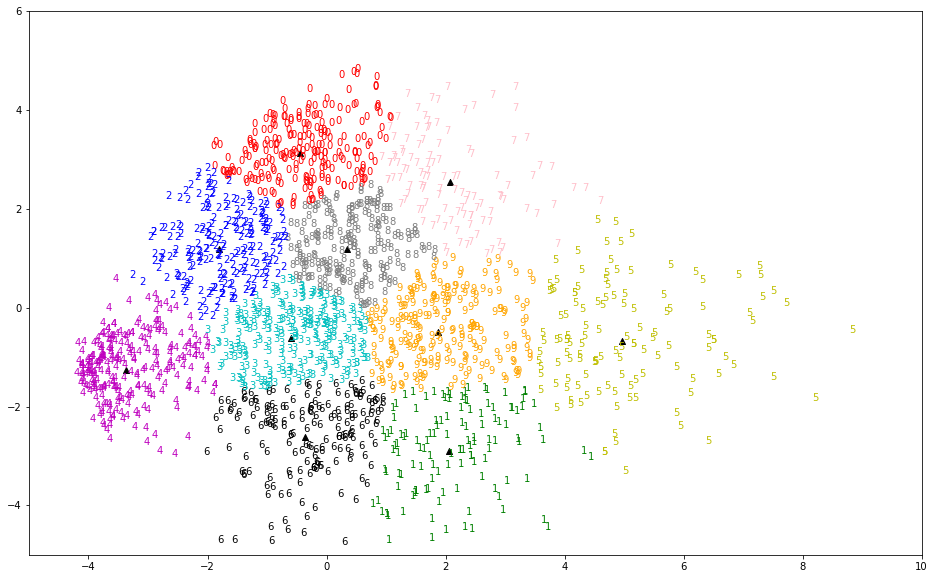

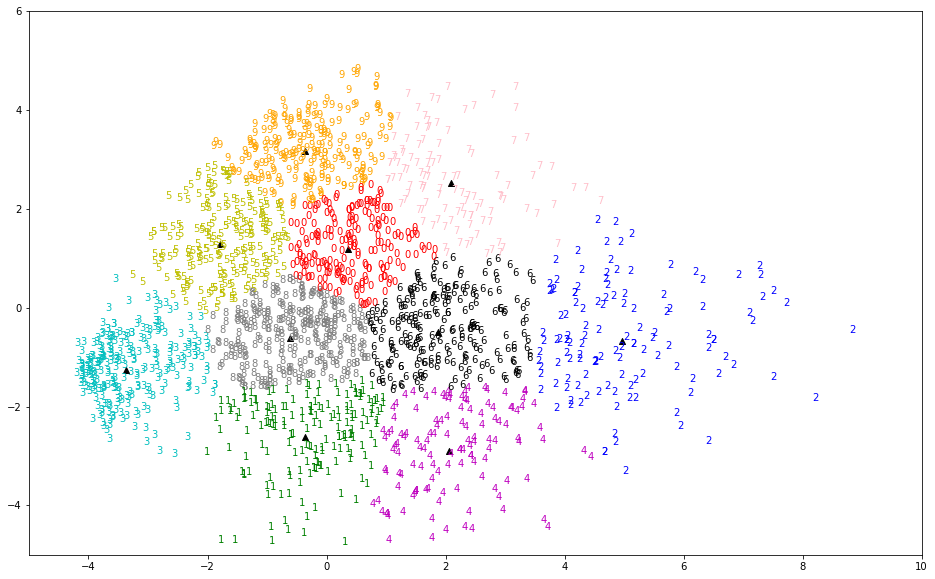

In [153]:
#k-means聚类
#使用函数库中pca函数降维
estimator = KMeans(n_clusters=10)
estimator.fit(newsample)
y_pred = estimator.labels_
center = estimator.cluster_centers_
#使用编写的pca降维结果
estimator.fit(newsample_def)
y_pred_def = estimator.labels_
center_def = estimator.cluster_centers_
mark = ['r','g','b','c','m','y','k','pink','gray','orange']
marker = ['$0$','$1$','$2$','$3$','$4$','$5$','$6$','$7$','$8$','$9$']
#plt.scatter(newsample[:,0],newsample[:,1],c=np.array(mark)[y_pred],marker=np.array(marker)[y_pred])

plt.figure(figsize=(16,10))
for i in range(y_pred.size):
    plt.text(newsample[i,0],newsample[i,1],marker[y_pred[i]],fontdict={'color':mark[y_pred[i]]})
plt.scatter(center[:,0],center[:,1],c='black',marker='^')
plt.ylim((-5,6))
plt.xlim((-5,10))
plt.savefig('k-meanspca.png')#保存图片，要在show之前保存，否则是空白的
plt.show()
plt.figure(figsize=(16,10))
for i in range(y_pred.size):
    plt.text(newsample_def[i,0],newsample_def[i,1],marker[y_pred_def[i]],fontdict={'color':mark[y_pred_def[i]]})
plt.scatter(center_def[:,0],center_def[:,1],c='black',marker='^')
plt.ylim((-5,6))
plt.xlim((-5,10))
plt.savefig('k-meanspcadef.png')
plt.show()
# plt.scatter(newsample_std[:,0],newsample_std[:,1],c=np.array(mark)[y_predstd])
# plt.show()